This notebook is for explorations and analysis of the data

Code adapted from group member Juhee Sung-Schenck

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [2]:
# read in the dataset

df = pd.read_csv('../data/final_labeled.csv')

In [3]:
## Uncomment to run this cell


# columns = [col for col in df.columns if col != 'label']

# fig = px.histogram(df, x = 'n_words', color = 'label', marginal = 'box', hover_data = columns,
#                    labels = {'n_words': 'Number of Words in a Single Tweet',
#                              'label': 'Disaster (1) or Non-disaster(0)'},
#                    color_discrete_sequence = ['hotpink', 'slategray'])
# pyo.iplot(fig)

# fig.write_html(f'../images/word_count.html')

In [4]:
# ## Uncomment to run this cell

# # distribution of word counts 

# plt.figure(figsize = (10, 8))

# plt.hist(df[df['label'] == 1]['n_words'], bins = 50, alpha = 0.5, label = 'Disaster')
# plt.hist(df[df['label'] == 0]['n_words'], bins = 50, alpha = 0.5, label = 'No Disaster')
# plt.xlabel('Tweet Word Count', size = 12)
# plt.ylabel('Frequency of Tweet Word Count', size = 12)
# plt.title('Tweet Word Count Frequency', size = 14)

# plt.legend()
# plt.savefig('../images/word_count.png');

In [5]:
# #Uncomment to run this cell

# fig = px.histogram(df, x = 'n_sentence', color = 'label', marginal = 'rug', hover_data = columns,
#                    labels = {'n_sentence': 'Number of Sentences in a Single Tweet',
#                              'label': 'Disaster (1) or Non-disaster(0)'},
#                    color_discrete_sequence = ['hotpink', 'slategray'])
# pyo.iplot(fig)

# fig.write_html(f'../images/sentence_count.html')

In [6]:
### Uncomment
# # distribution of sentence counts 

# plt.figure(figsize = (10, 8))

# plt.hist(df[df['label'] == 1]['n_sentence'], bins = 20, alpha = 0.5, label = 'Disaster')
# plt.hist(df[df['label'] == 0]['n_sentence'], bins = 20, alpha = 0.5, label = 'No Disaster')
# plt.xlabel('Tweet Word Count', size = 12)
# plt.ylabel('Frequency of Tweet Sentence Count', size = 12)
# plt.title('Tweet Sentence Count Frequency', size = 14)

# plt.legend()
# plt.savefig('../images/sentence_count.png');

In [8]:
# set X for vectorization

X = df['text_clean']

### CountVectorizer

In [9]:
# create custom stop words

relevant_words = ['wildfire','wildfires','california','oregon']

# using wordcloud stopwords

stop = list(STOPWORDS) + relevant_words

In [10]:
# instantiate countvectorizer with stopwords

cvec = CountVectorizer(stop_words = stop)

In [11]:
# transform and fit on X_train, and transform X_test

X_cv = cvec.fit_transform(X)

print(X_cv.shape)

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



(19999, 25229)


In [12]:
# turn X_train to a dataframe

X_cv_df = pd.DataFrame(X_cv.toarray(), 
                       columns = cvec.get_feature_names())

In [12]:
# get count of common words

# empty dictionary

common = {}

# loop through columns

for col in X_cv_df.columns:
    
    # save sum of each column in dictionary
    common[col] = X_cv_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common = pd.DataFrame(sorted(common.items(), key = lambda x: x[1], reverse = True))

In [13]:
# find top 20 words

most_common[:20]

,0,1
0,trump,2699
1,climate,2134
2,smoke,1384
3,change,1325
4,west,1086
5,will,1061
6,wa,1043
7,fire,993
8,ha,966
9,don,880


In [13]:
### Uncomment to run this cell
# # plot top 20 words 

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common[0][:20], most_common[1][:20], align='center')

# ax.set_yticks(most_common.index[:20])
# ax.set_yticklabels(most_common[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom

# ax.set_xlabel('Word Count')
# ax.set_ylabel('Most Common Words by CountVectorizer', size = 12)
# ax.set_title('Top 20 Common words', size = 14)

# plt.savefig('../images/top20.png');

In [15]:
## find the top 20 words for disaster related tweets and non-disaster tweets

disaster = df[df['label'] == 1]['text_clean']
nondisaster = df[df['label'] == 0]['text_clean']

# instantiate another cvecs

cvec_disaster = CountVectorizer(stop_words = stop)
cvec_nondisaster = CountVectorizer(stop_words = stop)

# transform and fit

disaster = cvec_disaster.fit_transform(disaster)
nondisaster = cvec_nondisaster.fit_transform(nondisaster)

# store them in dataframes

disaster_df = pd.DataFrame(disaster.toarray(), 
                           columns = cvec_disaster.get_feature_names())

nondisaster_df = pd.DataFrame(nondisaster.toarray(),
                              columns = cvec_nondisaster.get_feature_names())

## get count of common words

# empty dictionaries

common_disaster = {}
common_nondisaster = {}

# loop through columns in sub1_df

for col in disaster_df.columns:
    
    # save sum of each column in dictionary
    common_disaster[col] = disaster_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_disaster = pd.DataFrame(sorted(common_disaster.items(), key = lambda x: x[1], reverse = True))

# loop through columns in sub2_df

for col in nondisaster_df.columns:
    
    # save sum of each column in dictionary
    common_nondisaster[col] = nondisaster_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_nondisaster = pd.DataFrame(sorted(common_nondisaster.items(), key = lambda x: x[1], reverse = True))

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [16]:
# top 20 words in disaster

most_common_disaster[:20]

,0,1
0,trump,2545
1,climate,2119
2,smoke,1365
3,change,1273
4,west,1075
5,fire,947
6,biden,777
7,coast,755
8,science,728
9,will,705


In [17]:
# top 20 words in non-disaster

most_common_nondisaster[:20]

,0,1
0,wa,565
1,one,428
2,friend,390
3,don,371
4,time,357
5,will,356
6,good,324
7,love,321
8,now,320
9,know,317


In [14]:
### Uncomment to run this cell
# # plot top 20 words in disaster

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common_disaster[0][:20], most_common_disaster[1][:20], align='center')

# ax.set_yticks(most_common_disaster.index[:20])
# ax.set_yticklabels(most_common_disaster[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_ylabel('Most Common Words by CountVectorizer', size = 12)
# ax.set_title('Top 20 Common words - Disaster', size = 14)

# plt.savefig('../images/top20_disaster.png');

In [15]:
# ### Uncomment to run this cell

# # plot top 20 words - non-disaster

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common_nondisaster[0][:20], most_common_nondisaster[1][:20], align='center')

# ax.set_yticks(most_common_nondisaster.index[:20])
# ax.set_yticklabels(most_common_nondisaster[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom

# ax.set_xlabel('Word Count')
# ax.set_ylabel('Most Common Words by CountVectorizer', size = 12)
# ax.set_title('Top 20 Common words - Non-Disaster', size = 14)

# plt.savefig('../images/top20_nondisaster.png');

### TfidfVectorizer

In [20]:
# instantiate countvectorizer with stopwords

tvec = TfidfVectorizer(stop_words = stop)

In [21]:
# transform and fit on X_train, and transform X_test

X_tv = tvec.fit_transform(X)

print(X_tv.shape)

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



(19999, 25229)


In [22]:
# turn X_train to a dataframe

X_tv_df = pd.DataFrame(X_tv.toarray(), 
                       columns = tvec.get_feature_names())

In [23]:
# get count of common words

# empty dictionary

common = {}

# loop through columns

for col in X_tv_df.columns:
    
    # save sum of each column in dictionary
    common[col] = X_tv_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common = pd.DataFrame(sorted(common.items(), key = lambda x: x[1], reverse = True))

In [24]:
# find top 20 words

most_common[:20]

,0,1
0,trump,399.881979
1,climate,335.986166
2,smoke,248.076581
3,change,224.080554
4,west,197.090467
5,wa,180.551731
6,will,174.859266
7,know,170.474316
8,don,169.577866
9,science,164.538052


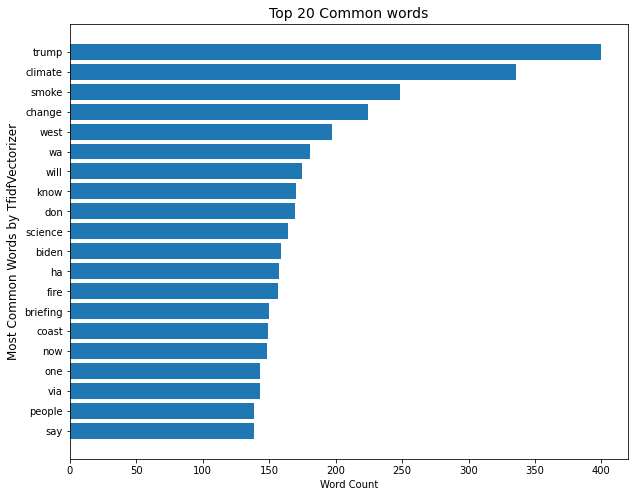

In [25]:
## Uncomment to run this cell

# # plot top 20 words 

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common[0][:20], most_common[1][:20], align='center')

# ax.set_yticks(most_common.index[:20])
# ax.set_yticklabels(most_common[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom

# ax.set_xlabel('Word Count')
# ax.set_ylabel('Most Common Words by TfidfVectorizer', size = 12)
# ax.set_title('Top 20 Common words', size = 14)

# plt.savefig('../images/top20_tfidf.png');

In [26]:
## find the top 20 words for disaster related tweets and non-disaster tweets

disaster = df[df['label'] == 1]['text_clean']
nondisaster = df[df['label'] == 0]['text_clean']

# instantiate another cvecs

tvec_disaster = TfidfVectorizer(stop_words = stop)
tvec_nondisaster = TfidfVectorizer(stop_words = stop)

# transform and fit

disaster = tvec_disaster.fit_transform(disaster)
nondisaster = tvec_nondisaster.fit_transform(nondisaster)

# store them in dataframes

disaster_df = pd.DataFrame(disaster.toarray(), 
                           columns = tvec_disaster.get_feature_names())

nondisaster_df = pd.DataFrame(nondisaster.toarray(),
                              columns = tvec_nondisaster.get_feature_names())

## get count of common words

# empty dictionaries

common_disaster = {}
common_nondisaster = {}

# loop through columns in sub1_df

for col in disaster_df.columns:
    
    # save sum of each column in dictionary
    common_disaster[col] = disaster_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_disaster = pd.DataFrame(sorted(common_disaster.items(), key = lambda x: x[1], reverse = True))

# loop through columns in sub2_df

for col in nondisaster_df.columns:
    
    # save sum of each column in dictionary
    common_nondisaster[col] = nondisaster_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_nondisaster = pd.DataFrame(sorted(common_nondisaster.items(), key = lambda x: x[1], reverse = True))

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [27]:
# top 20 words in disaster

most_common_disaster[:20]

,0,1
0,trump,319.989543
1,climate,285.644224
2,smoke,211.677331
3,change,190.756902
4,west,172.032558
5,science,151.143929
6,biden,143.120590
7,briefing,141.854179
8,coast,134.408418
9,fire,129.684734


In [28]:
# top 20 words in non-disaster

most_common_nondisaster[:20]

,0,1
0,wa,109.800190
1,friend,107.706559
2,love,96.815385
3,one,94.030826
4,good,90.162211
5,action,87.644732
6,co,87.244612
7,op,86.005210
8,review,85.894981
9,grab,85.835137


In [16]:
### Uncomment to run this cell
# # plot top 20 words in disaster

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common_disaster[0][:20], most_common_disaster[1][:20], align='center')

# ax.set_yticks(most_common_disaster.index[:20])
# ax.set_yticklabels(most_common_disaster[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom

# ax.set_xlabel('Word Count')
# ax.set_ylabel('Most Common Words by CountVectorizer', size = 12)
# ax.set_title('Top 20 Common words - Disaster', size = 14)

# plt.savefig('../images/top20_disaster_t.png');

In [17]:
# ## Uncomment to run this cell
# # plot top 20 words - non-disaster

# fig, ax = plt.subplots(figsize = (10, 8))

# ax.barh(most_common_nondisaster[0][:20], most_common_nondisaster[1][:20], align='center')

# ax.set_yticks(most_common_nondisaster.index[:20])
# ax.set_yticklabels(most_common_nondisaster[0][:20])
# ax.invert_yaxis()  # labels read top-to-bottom

# ax.set_xlabel('Word Count')
# ax.set_ylabel('Most Common Words by CountVectorizer', size = 12)
# ax.set_title('Top 20 Common words - Non-Disaster', size = 14)

# plt.savefig('../images/top20_nondisaster_t.png');

### WordCloud

In [18]:
# ### Uncomment to run this cell
# # Wordcloud with stopwords

# mask = np.array(Image.open('../images/usa.jpg'))
# txt = ' '.join(df['text_clean'].dropna())

# wc = WordCloud(mask = mask, max_words = 4000, stopwords = stop, colormap = 'magma', 
#                background_color = 'snow', random_state = 42).generate(txt)
# plt.figure(figsize = (24, 24))

# plt.imshow(wc)
# plt.axis('off')
# plt.title('')
# plt.savefig('../images/wc_stopwords.png');

In [19]:
# ### Uncomment to run this cell
# # Wordcloud without stopwords

# mask = np.array(Image.open('../images/usa.jpg'))
# txt = ' '.join(df['text_clean'].dropna())

# wc = WordCloud(mask = mask, max_words = 4000, stopwords = None, colormap = 'magma', 
#                background_color = 'snow', random_state = 42).generate(txt)
# plt.figure(figsize = (24, 24))

# plt.imshow(wc)
# plt.axis('off')
# plt.title('')
# plt.savefig('../images/wc_nostop.png');